x = [11 12 13 14 15 17 18 19 20 21 24 25 27 28 31 32 33 36 37 38 40 41 44 45
 46 49 50 51 54 55]
y = [11.3 15.1  6.6 12.9 12.1 18.1 20.9 17.6 11.  24.6 11.3 18.4 16.2 19.5
 35.8 37.1 45.7 34.8 25.6 26.7 22.  26.  10.5 18.6 21.  11.9 13.7 13.7
  6.3  1.8]
Quadratic Equation = y=-20.9623+2.9955x-0.0463x^2
predict value = [6.3841, 8.3143, 10.1519, 11.8969, 13.5493, 16.5761, 17.9506, 19.2324, 20.4216, 21.5182, 24.2522, 24.9782, 26.1525, 26.6006, 27.3894, 27.467, 27.452, 26.8513, 26.4658, 25.9876, 24.7535, 23.9974, 21.1736, 20.047, 18.8278, 14.6145, 13.0248, 11.3425, 5.7397, 3.6869]
residual=[4.9159, 6.7857, -3.5519, 1.0031, -1.4493, 1.5239, 2.9494, -1.6324, -9.4216, 3.0818, -12.9522, -6.5782, -9.9525, -7.1006, 8.4106, 9.633, 18.248, 7.9487, -0.8658, 0.7124, -2.7535, 2.0026, -10.6736, -1.447, 2.1722, -2.7145, 0.6752, 2.3575, 0.5603, -1.8869]
SSResid = 1268.9354943300002
SSTo = 2855.5786666666663
  x     y    predicted_value    residual
---  ----  -----------------  ----------
 11  11.3     

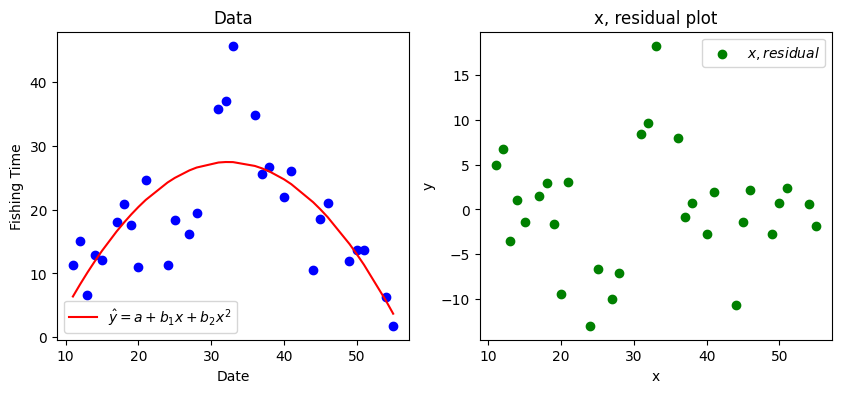

In [1]:
from ast import Eq
from db import data4
import matplotlib.pyplot as plt
from tabulate import tabulate
from num_extended import NumExtended
import numpy as np

num = NumExtended()
x = np.array([i[0] for i in data4])
y = np.array([i[1] for i in data4])
print(f'x = {x}')
print(f'y = {y}')

a, b1, b2 = np.polynomial.polynomial.polyfit(x, y, deg=2)
eq = f'y={round(a,4)}{"+" if b1>0 else ""}{round(b1,4)}x{"+" if b2>0 else ""}{round(b2,4)}x^2'
print(f'Quadratic Equation = {eq}')
n = len(data4)
predict_value = num.quadratic(a, b1, b2, x)
print(f'predict value = {predict_value}')
# Residual
residual = num.residual(y, predict_value)
print(f'residual={residual}')
# SSResid
SSResid = num.SSResid(y, predict_value)
print(f'SSResid = {SSResid}')
# SSTo
SSTo = num.SSTo(y)
print(f'SSTo = {SSTo}')
r_square = round((1 - (SSResid / SSTo)) * 100, 2)
se = round((SSResid / (n - 2)) ** 0.5, 4)
data = list(zip(x, y, predict_value, residual))
data_table = tabulate(data, headers=["x", "y", "predicted_value", "residual"])
print(data_table)
print("")
print(f'r^2 = {r_square}%')
print(f'se = {se}')
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x, y, c='b', marker='o', alpha=1)
ax1.plot(x, (a + b1 * x + b2 * (x ** 2)), '-', c='r', label=r'$\hat{y} = a + b_1x + b_2x^2$')
ax1.legend()
ax1.set_title('Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Fishing Time')
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(x, residual, c='g', marker='o', alpha=1, label=r'$x,residual$')
ax2.legend()
ax2.set_title('x, residual plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()
